## Motivation

When I was researching in the ETF space, I found this interesting FANGMA index-based ETF listed on the Toronto Stock Exchange that is launched by Evolves and provided by Solactive AG. It is an equal weight index, so it's subject to rebalancing every once in a while. But I wanted to twist it with my own version and see if it has the potential to be profitable.

The FANGMA ETF contains 6 stocks: FB (META), AAPL, NFLX, GOOG, MSFT, AMZN. In this research, I will apply a simple mean-reverting strategy on these stocks and backtest the strategy to see if it is lucrative.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scope of research

We will cover the aforementioned 6 stocks over the span of the past 10 years.

In [2]:
# parameter control
start_date = '2012-07-31'
end_date = '2022-08-22'

In [3]:
def get_close_price(ticker):
    df = pd.read_csv(f'data/{ticker}.csv')
    df.set_index('Date', inplace=True)
    price = df['Close']
    price.rename(f'{ticker.upper()}', inplace=True)
    return price

In [4]:
msft = get_close_price('MSFT')
df_fangma = pd.DataFrame(msft)
df_fangma.head()

,MSFT
Date,
1999-12-31,36.61
2000-01-03,36.56
2000-01-04,35.32
2000-01-05,35.69
2000-01-06,34.50


In [5]:
# get the rest of the tickers
stock_list = ['AAPL', 'META', 'AMZN', 'GOOG', 'NFLX']

for stock in stock_list:
    df_stock = get_close_price(stock)
    df_fangma = pd.merge(df_fangma, df_stock, on='Date')

print(df_fangma)

              MSFT    AAPL    META    AMZN    GOOG    NFLX
Date                                                      
2012-05-18   23.85   16.17   38.23   10.69   14.95    9.99
2012-05-21   24.24   17.12   34.03   10.91   15.30   10.25
2012-05-22   24.25   16.98   31.00   10.77   14.96    9.67
2012-05-23   23.72   17.40   32.00   10.86   15.18   10.27
2012-05-24   23.69   17.24   33.03   10.76   15.04   10.04
...            ...     ...     ...     ...     ...     ...
2022-08-15  292.85  173.19  180.89  143.18  122.88  249.11
2022-08-16  292.09  173.03  179.47  144.78  122.51  245.69
2022-08-17  291.32  174.55  174.85  142.10  120.32  241.15
2022-08-18  290.17  174.15  174.66  142.30  120.86  245.17
2022-08-19  286.15  171.52  167.96  138.23  118.12  241.16

[2581 rows x 6 columns]


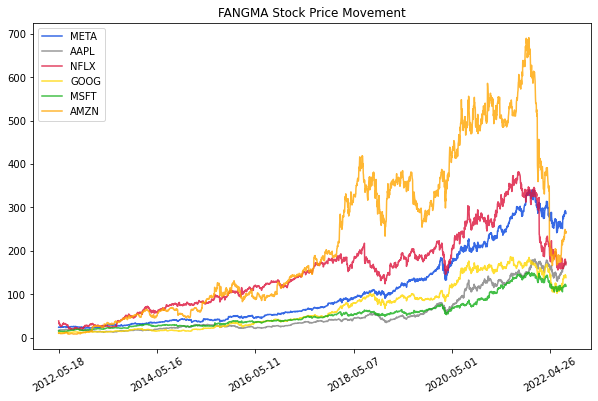

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df_fangma['MSFT'], label='META', color='#0343DF', alpha=0.8)
plt.plot(df_fangma['AAPL'], label='AAPL', color='#808080', alpha=0.8)
plt.plot(df_fangma['META'], label='NFLX', color='#DC143C', alpha=0.8)
plt.plot(df_fangma['AMZN'], label='GOOG', color='#FFD700', alpha=0.8)
plt.plot(df_fangma['GOOG'], label='MSFT', color='#15B01A', alpha=0.8)
plt.plot(df_fangma['NFLX'], label='AMZN', color='#FFA500', alpha=0.8)
plt.xticks(np.arange(0, len(df_fangma.index), 500), rotation=30)
plt.title('FANGMA Stock Price Movement')
plt.legend()
plt.show()

## Methodology

Instead of using equal weight approach, I will use daily mean reversion strategy, in which I will put more weight on the stock that is further from the average daily return and rebalance on a daily basis.

In [7]:
# calculate daily return
df_daily_return = df_fangma.pct_change()
df_daily_return.head()

,MSFT,AAPL,META,AMZN,GOOG,NFLX
Date,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,0.016352,0.058751,-0.109861,0.020580,0.023411,0.026026
2012-05-22,0.000413,-0.008178,-0.089039,-0.012832,-0.022222,-0.056585
2012-05-23,-0.021856,0.024735,0.032258,0.008357,0.014706,0.062048
2012-05-24,-0.001265,-0.009195,0.032188,-0.009208,-0.009223,-0.022395


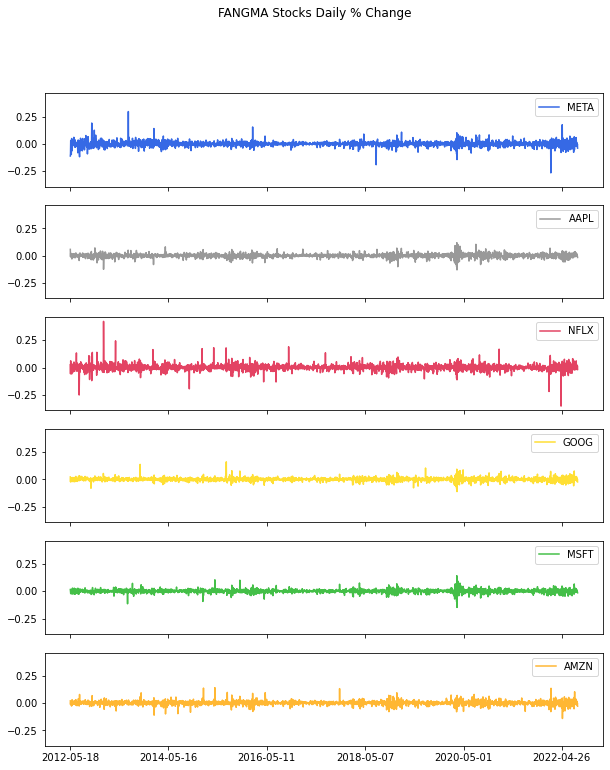

In [8]:
fig, axs = plt.subplots(6, sharex=True, sharey=True, figsize=(10,12))
fig.suptitle('FANGMA Stocks Daily % Change')
axs[0].plot(df_daily_return['META'], color='#0343DF', label='META', alpha=0.8)
axs[1].plot(df_daily_return['AAPL'], color='#808080', label='AAPL', alpha=0.8)
axs[2].plot(df_daily_return['NFLX'], color='#DC143C', label='NFLX', alpha=0.8)
axs[3].plot(df_daily_return['GOOG'], color='#FFD700', label='GOOG', alpha=0.8)
axs[4].plot(df_daily_return['MSFT'], color='#15B01A', label='MSFT', alpha=0.8)
axs[5].plot(df_daily_return['AMZN'], color='#FFA500', label='AMZN', alpha=0.8)

for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks(np.arange(0, len(df_fangma.index), 500))
    ax.legend(loc='upper right')

plt.show()

In [9]:
# calculate equal-weighted daily return
portfolio_daily_return = df_daily_return.mean(axis=1)
portfolio_daily_return

Date
2012-05-18         NaN
2012-05-21    0.005876
2012-05-22   -0.031407
2012-05-23    0.020041
2012-05-24   -0.003183
                ...   
2022-08-15    0.002064
2022-08-16   -0.002822
2022-08-17   -0.012410
2022-08-18    0.002540
2022-08-19   -0.022491
Length: 2581, dtype: float64

In [10]:
# calculate average portfolio daily return
avg_portfolio_daily_return = np.mean(portfolio_daily_return)
avg_portfolio_daily_return

0.001147941701134346

If it is equally weighted, the portfolio of the FANGMA stocks has a 0.115% daily return for the past 10 years, not bad

In [11]:
# calculate weight of each stock, which is proportional to the negative distance to the portfolio
weights = -(np.array(df_daily_return) - np.array(portfolio_daily_return).reshape((df_daily_return.shape[0], 1)))
weights

array([[        nan,         nan,         nan,         nan,         nan,
                nan],
       [-0.0104757 , -0.05287428,  0.11573786, -0.01470348, -0.01753487,
        -0.02014953],
       [-0.03181987, -0.02322976,  0.05763176, -0.01857506, -0.00918511,
         0.02517804],
       ...,
       [-0.00977375, -0.02119453,  0.01333254,  0.00610092,  0.00546617,
         0.00606865],
       [ 0.00648752,  0.00483158,  0.00362661,  0.00113251, -0.00194806,
        -0.01413015],
       [-0.00863681, -0.00738883,  0.01586949,  0.00611079,  0.00018011,
        -0.00613475]])

In [12]:
# calculate sum of weights
sum_weights = np.nansum(abs(weights), axis=1)
sum_weights

array([0.        , 0.23147573, 0.16561959, ..., 0.06193655, 0.03215643,
       0.04432078])

In [13]:
# exclude stocks that do not have valid prices or daily returns
weights[sum_weights == 0] = 0
sum_weights[sum_weights == 0] = 1

weights = weights / sum_weights.reshape((df_daily_return.shape[0], 1))
weights

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.04525616, -0.22842255,  0.5       , -0.06352063, -0.07575254,
        -0.08704813],
       [-0.19212624, -0.14025972,  0.34797669, -0.11215499, -0.05545905,
         0.15202331],
       ...,
       [-0.15780261, -0.34219739,  0.21526126,  0.09850275,  0.08825432,
         0.09798167],
       [ 0.20174867,  0.15025222,  0.11278037,  0.03521874, -0.06058082,
        -0.43941918],
       [-0.19487034, -0.16671253,  0.35805982,  0.13787649,  0.00406369,
        -0.13841713]])

In [14]:
# calculate daily portfolio P&L
df_weights = pd.DataFrame(weights)

daily_pnl = np.nansum(np.array(df_weights.shift()) * np.array(df_daily_return), axis=1)
print(daily_pnl)
print(daily_pnl.shape)

[ 0.          0.         -0.03524612 ... -0.00283184  0.0033413
 -0.00183715]
(2581,)


In [15]:
# remove date outside of interest
daily_pnl = daily_pnl[np.logical_and(df_fangma.index >= start_date, df_fangma.index <= end_date)]
print(daily_pnl)
print(daily_pnl.shape)

[-0.03078152 -0.01669617 -0.01013207 ... -0.00283184  0.0033413
 -0.00183715]
(2531,)


In [16]:
# store date list for later use
date_list = df_fangma.loc[start_date: end_date].index
date_list

Index(['2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03', '2012-08-06',
       '2012-08-07', '2012-08-08', '2012-08-09', '2012-08-10', '2012-08-13',
       ...
       '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
       '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19'],
      dtype='object', name='Date', length=2531)

## Backtesting

We will calculate its Sharpe ratio, maximum drawdown and maximum drawdown duration.

In [17]:
# calculate annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * np.mean(daily_pnl) / np.std(daily_pnl)
sharpe_ratio

-0.005232525635425135

In [18]:
# calculate cumulative return
cum_return = np.cumprod(1 + daily_pnl) - 1
df_cum_return = pd.DataFrame({'Date': date_list, 'Cum Return': cum_return})
df_cum_return.head()

,Date,Cum Return
0,2012-07-31,-0.030782
1,2012-08-01,-0.046964
2,2012-08-02,-0.056620
3,2012-08-03,-0.039703
4,2012-08-06,-0.040990


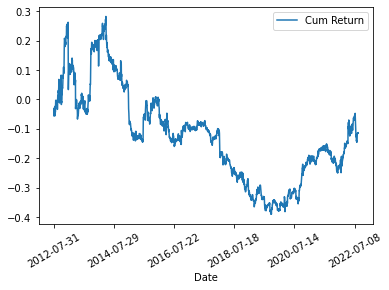

In [19]:
df_cum_return.plot(x='Date', y='Cum Return')
plt.xticks(rotation=30)
plt.show()

In [20]:
# calculate high watermark
df_cum_return['High Watermark'] = df_cum_return['Cum Return'].cummax()
df_cum_return.head()

,Date,Cum Return,High Watermark
0,2012-07-31,-0.030782,-0.030782
1,2012-08-01,-0.046964,-0.030782
2,2012-08-02,-0.056620,-0.030782
3,2012-08-03,-0.039703,-0.030782
4,2012-08-06,-0.040990,-0.030782


In [21]:
# calculate drawdown
df_cum_return['Drawdown'] = (1 + df_cum_return['Cum Return']) / (1 + df_cum_return['High Watermark']) - 1
df_cum_return.head()

,Date,Cum Return,High Watermark,Drawdown
0,2012-07-31,-0.030782,-0.030782,0.000000
1,2012-08-01,-0.046964,-0.030782,-0.016696
2,2012-08-02,-0.056620,-0.030782,-0.026659
3,2012-08-03,-0.039703,-0.030782,-0.009205
4,2012-08-06,-0.040990,-0.030782,-0.010533


In [22]:
# calculate drawdown duration
# set condition
condition = df_cum_return['Drawdown'] != 0
df_cum_return['Drawdown Duration'] = condition.cumsum() - condition.cumsum().where(~condition).ffill().fillna(0).astype(int)
df_cum_return.head()

,Date,Cum Return,High Watermark,Drawdown,Drawdown Duration
0,2012-07-31,-0.030782,-0.030782,0.000000,0
1,2012-08-01,-0.046964,-0.030782,-0.016696,1
2,2012-08-02,-0.056620,-0.030782,-0.026659,2
3,2012-08-03,-0.039703,-0.030782,-0.009205,3
4,2012-08-06,-0.040990,-0.030782,-0.010533,4


In [23]:
# find maximum drawdown, maximum drawdown duration and its start and end dates
max_dd = np.min(df_cum_return['Drawdown'])
max_ddd = int(np.max(df_cum_return['Drawdown Duration']))
end_date = df_cum_return[df_cum_return['Drawdown Duration'] == max_ddd]['Date'].values[0]
start_date = df_cum_return.shift(max_ddd)[df_cum_return['Date'] == end_date]['Date'].values[0]

print(f'Maximum drawdown is {(max_dd * 100):.2f}%')
print(f'Maximum drawdown duration lasts {max_ddd} days from {start_date} to {end_date}')

Maximum drawdown is -52.40%
Maximum drawdown duration lasts 2097 days from 2014-04-23 to 2022-08-19


## Conclusion

- Sharpe ratio represents the risk-adjust return. For this strategy, it is negative even before any transaction costs, making this strategy unattractive
- Drawdown tells us how much the portfolio could have lost in the backtesting period. In this case, the maximum drawdown is 52.40% and has not been recouped for over 8 years
- This strategy is not proven to be profitable

## Next steps

To propose alternative methodologies, we can think about changing the allocation of the portfolio, looking for other securities, or using momentum instead of mean-reverting approach.

- Instead of finding weights based on their distance to the average return, we can apply technical or fundamental analysis such as RSI or P/E ratio to help us determine how much weights to put on each stock.
- As all stocks in the portfolio are in the large-cap Tech sector, we see that they tend to move in the same direction in the first graph => it may be better to use momentum strategy rather than mean-reverting strategy on their price movement.
- This leads to a discussion that perhaps the mean-reverting strategy fits better with inputs such as their daily return, as suggested in the second graph.